<h1> Partitionieredes Clustering 1 </h1>
<h2>Vorbereitung der Datensätze</h2>

Bevor mit dem partitionierenden Clustering begonnen werden kann, muss eine <b>Anzahl von Clustern festgelegt</b> werden.<br>
In unserem Fall sind das 4 Stück.<br>
Zuerst legen wir zufällig Datensätze an mit der make_blobs Methode.<br>

<table style="width:100%">
  <tr>
    <th>Parameter</th>
    <th>Bedeutung</th>
    <th>Wert</th>
  </tr>
  <tr>
    <td>n_samples</td>
    <td>Wie viele Datensätze angelegt werden sollen?</td>
    <td>1000</td>
  </tr>
  <tr>
    <td>n_features</td>
    <td>Wie viele Merkmale werden angelegt?</td>
    <td>5</td>
  </tr>
  <tr>
    <td>centers</td>
    <td>Wie viele Zentren sollen gebildet werden</td>
    <td>4</td>
  </tr>
  <tr>
    <td>cluster_std</td>
    <td>Wie groß ist die Standabweichung?</td>
    <td>3</td>
  </tr>
  <tr>
    <td>random_state</td>
    <td>Dadurch bleibt die Rückgabe der Methode konstant/gleich</td>
    <td>0</td>
  </tr>
</table>

<h3>Situation:</h3><br>
Angenommen die 1000 Datensätze stellen 1000 Kunden einer Bank dar, die anhand der 5 Merkmale in 4 Bonitätsklassen eingeteilt werden. 

Die <b>Dokumentation</b> zu der make_blobs Methode kann hier aufgerufen werden <a>https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html</a>

In [1]:
from sklearn.datasets import make_blobs
import sklearn
from sklearn.cluster import KMeans as KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

X , y= make_blobs(n_samples = 1000, n_features=5, centers=4, cluster_std=3, random_state=0)

print(X)
print("------------------------------------------------------------------------------")
print(y)

[[  4.2900055    1.2593096    0.24827196   3.66188885  -0.14446058]
 [  1.681067    -2.45863333   2.34537436   7.18574985  -1.59087155]
 [  4.59321328  -0.93449785   5.19647879  11.32842795 -16.72811976]
 ...
 [ -7.93096819 -14.08186468   5.21229594  11.04946131   5.03603886]
 [  3.09353384   6.03137763   0.35870238  11.23490864 -11.08959196]
 [-10.66713243 -12.36153503  11.97456592   5.64940373   9.05913451]]
------------------------------------------------------------------------------
[0 1 2 0 0 3 2 0 3 2 3 3 1 1 3 0 1 2 1 2 0 0 2 1 3 0 3 3 3 1 2 3 0 1 3 2 3
 2 2 3 3 3 3 2 1 3 1 3 1 2 1 2 0 2 2 2 0 3 0 3 2 3 3 1 2 1 0 1 2 2 3 2 0 2
 0 3 3 1 2 0 2 0 3 0 1 0 1 1 2 3 0 3 1 0 1 0 1 2 0 3 2 1 2 3 2 3 1 1 2 2 3
 1 2 2 2 1 2 3 1 3 2 1 3 0 2 3 0 0 0 0 0 0 3 3 3 3 1 3 1 3 3 1 2 1 0 3 1 0
 3 0 3 2 0 2 2 0 2 3 0 3 1 2 1 3 2 2 2 0 3 0 2 2 3 1 1 3 1 3 1 3 2 0 2 0 2
 2 2 1 1 1 3 0 1 1 1 3 3 2 2 1 1 3 3 1 1 1 2 3 0 3 0 1 3 0 3 2 0 2 1 2 0 0
 0 1 0 1 0 3 1 0 3 3 2 1 2 2 2 0 3 2 1 2 1 1 0 1 3 1 2 0 

#X = The generated samples (Xndarray [ndarray = n dimensionales array] of shape (n_samples, n_features))
#y = The integer labels for cluster membership of each sample ((n_samples,)

<h2> Visualisierung der Abhängigkeiten mit seaborn.pairplot </h2> <br>
Damit wir die Daten mit der pariplot Methode darstellen können, müssen diese in ein DataFrame Objekt umgewandelt werden.<br>
Was ist ein DF Object? -> Erklären

In [2]:
df = pd.DataFrame(X, columns = ['Gehalt', 'Alter', 'Merkmal3', 'Merkmal4', 'Merkmal5']) 
df['Bonitätsklasse'] = y+1
print(df)

        Gehalt      Alter   Merkmal3   Merkmal4   Merkmal5  Bonitätsklasse
0     4.290005   1.259310   0.248272   3.661889  -0.144461               1
1     1.681067  -2.458633   2.345374   7.185750  -1.590872               2
2     4.593213  -0.934498   5.196479  11.328428 -16.728120               3
3    -0.061675   2.912999   3.499712  -3.724727  -1.337118               1
4     2.348517   1.409951  -0.292620   0.566496  -4.690789               1
..         ...        ...        ...        ...        ...             ...
995  -0.273205  -2.541545   9.553714  11.305926   1.590382               2
996   0.605529  -2.690792   9.946217  12.060691  -1.217652               2
997  -7.930968 -14.081865   5.212296  11.049461   5.036039               4
998   3.093534   6.031378   0.358702  11.234909 -11.089592               3
999 -10.667132 -12.361535  11.974566   5.649404   9.059135               4

[1000 rows x 6 columns]


Mit der pairplot Methode visualisieren wir die Abhängigkeiten zwischen den fünf Merkmalen.<br>
Die Darstellung mit der scatterplot Methode ist das durch die Menge an Abhängigkeiten nicht möglich. <br>
Mit dem Paramerter hue werden die Zielklassen eingefärbt.

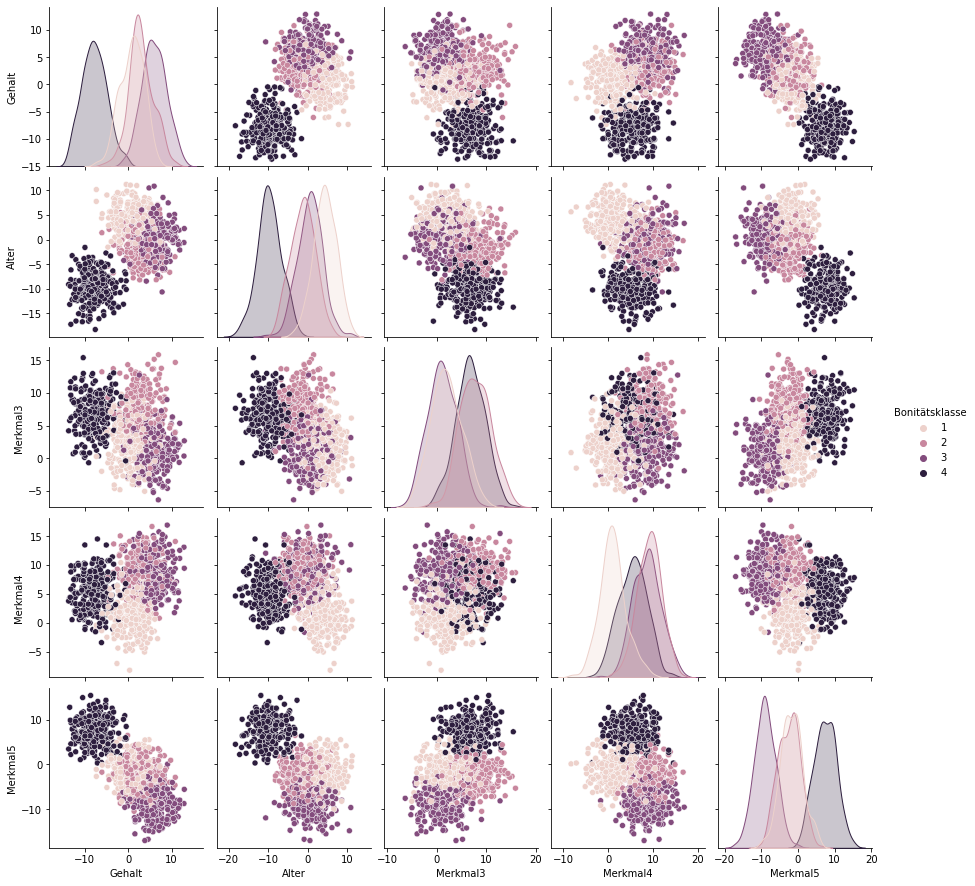

In [3]:
sns.pairplot(df, hue = 'Bonitätsklasse')

DARSTELLUNGSERKLÄRUNG <br>
5 dimensional, Achsen erklären <br>
Anmerkung: Corner = True kürzt Spiegelung weg, evtl. im zweiten Schritt nachher so darstellen, nachdem es komplett dargestellt wurde<br>
Da fünf Merkmale in 2-dimensionalen Raum nicht anders dargetsellt werden können erzeugt die Methode einen 5x5 plot.<br>

<h2> Partionierendes Clustern </h2><br>

<ol>
    <li>
        Zuerst werden 4 beliebige Werte/Datensätze ausgewählt denen die Datensätze nach Nähe zugeordnet werden. 
    </li>
    <li>
Infolgedessen werden die Centroide neu berechnet.
    </li>
    <li>
Je nach Distanz werden die Datensätze neu zugeordnet.
    </li>
    <li>
Dieser Vorgang wiederholt sich solang, bis ein Endkriterium erreicht ist. </li>
</ol>  

Ein Endkriterium kann zum Beispiel..... sein(j)

Parameter: algorithm nicht gesetzt dadurch default = elkan Algorithmus ERKLÄREN
restliche Methoden erklären

In [7]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)

y_kmeans=kmeans.predict(X)

sklearn.cluster.KMeans(n_clusters=4, random_state=0)
sklearn.metrics.accuracy_score(y_kmeans, y)

0.252

Die 0.252 sind Güte? RECHERCHE

In [5]:
sklearn.metrics.confusion_matrix(y_kmeans, y)

array([[238,   4,   3,   0],
       [  0,   0,   0, 250],
       [  7, 232,  14,   0],
       [  5,  14, 233,   0]], dtype=int64)

Erklärung Konfusionsmatrix

<AxesSubplot:>

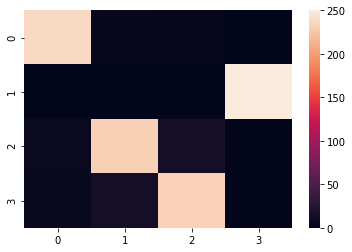

In [6]:
sns.heatmap(sklearn.metrics.confusion_matrix(y_kmeans, y))

Interpretation Abb.